<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_for_separated_flows_over_airfoils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth


In [2]:
from google.colab import auth
from google.colab import drive

In [3]:
auth.authenticate_user()

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/MyDrive/Data_from_Karim/AirfoilS809/


data_set1.csv  data_set2.csv  data_set3.csv  data_set4.csv  neuralNetwork_reg.py  ReadMe.docx


In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5,h1 = 61, h2 = 61, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
# torch.manual_seed(42)

model = Model()

In [9]:
# Read the data set - data_set3.csv --> Airfoil S809, Re = 2e6, alpha = 14.2 deg
df = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set3.csv")
df


,x,y,beta,feature1,feature2,feature3,feature4,feature5
0,0.997919,0.000257,1.0,0.025984,4.740000e-07,0.923826,0.000329,2.650000e-05
1,0.997809,0.000272,1.0,0.038271,3.490000e-07,1.001367,0.000212,3.590000e-05
2,0.997977,0.000226,1.0,0.110119,7.410000e-07,1.003305,0.000105,5.586610e-04
3,0.997921,0.000260,1.0,0.238758,1.300000e-05,0.812515,0.002879,1.910810e-04
4,0.997695,0.000287,1.0,0.011320,2.930000e-07,0.997945,0.000782,2.220000e-06
...,...,...,...,...,...,...,...,...
104173,-18.143043,-2.440683,1.0,5750.002879,9.323239e-01,20.218650,0.001524,4.490000e-10
104174,-16.994571,-1.759553,1.0,449.511102,8.836077e-01,284.615589,0.000528,5.750000e-09
104175,-18.232937,-1.591567,1.0,16440.483400,9.322857e-01,5.400816,0.001364,2.930000e-10
104176,-18.177182,-2.158839,1.0,13254.034340,9.323127e-01,7.694095,0.001503,3.610000e-10


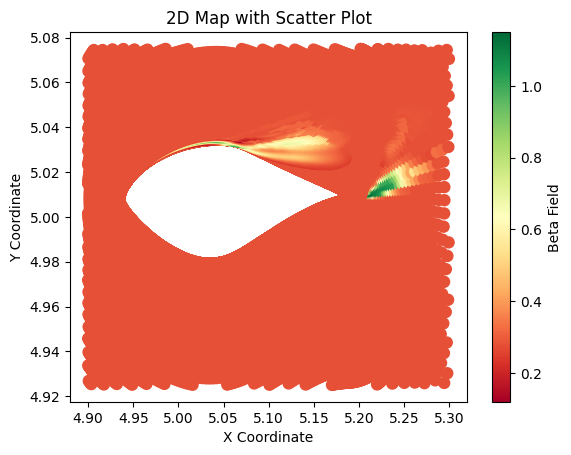

66981

In [10]:


# Visualize beta field for Airfoil S809, Re = 2e6, alpha = 14.2deg

xc = np.array(df['x'])
yc = np.array(df['y'])
b = np.array(df['beta'])

# Normalize x and y coordinates
min_range = -5.0
max_range = 5.0
xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# Normalize beta field
bmin = 0.12
bmax = 1.15
b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))

nx = []
ny = []
nb = []
# Filter data for the specified range of coordinates
for i in range(len(xc)):
  if xc[i]>=4.9 and xc[i]<=5.3:
    if yc[i]>=4.925 and yc[i]<=5.075:
      nx.append(xc[i])
      ny.append(yc[i])
      nb.append(b[i])

# # Create a 2D heatmap
# plt.hexbin(nx, ny, C=nb, gridsize=5000, cmap=plt.cm.YlOrRd_r)
# plt.colorbar(label='Field Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Field Visualization')
# plt.show()


# Create a scatter plot
plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
plt.colorbar(label='Beta Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Map with Scatter Plot')
plt.show()

len(nx)
# X, Y = np.meshgrid(nx, ny)

# # Create a contour plot
# plt.figure()
# contour = plt.contour(X, Y, nb, cmap='viridis')
# plt.colorbar(contour, label='Data Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Contour Plot')
# plt.show()

In [11]:
# Extract smaller data around the airfoil

xc = np.array(df['x'])
yc = np.array(df['y'])
b = np.array(df['beta'])

# Normalize x and y coordinates
min_range = -5.0
max_range = 5.0
xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# Normalize beta field
bmin = 0.12
bmax = 1.15
b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))


f1 = np.array(df['feature1'])
f2 = np.array(df['feature2'])
f3 = np.array(df['feature3'])
f4 = np.array(df['feature4'])
f5 = np.array(df['feature5'])


nx,ny,nb,nf1,nf2,nf3,nf4,nf5 = [[] for j in range(8)]


for i in range(len(xc)):
  if xc[i]>=4.92 and xc[i]<=5.3:
    if yc[i]>=4.98 and yc[i]<=5.05:
      nx.append(xc[i])
      ny.append(yc[i])
      nb.append(b[i])
      nf1.append(f1[i])
      nf2.append(f2[i])
      nf3.append(f3[i])
      nf4.append(f4[i])
      nf5.append(f5[i])

new_data = {
    'x': np.array(nx),
    'y': np.array(ny),
    'beta': np.array(nb),
    'feature1': np.array(nf1),
    'feature2': np.array(nf2),
    'feature3': np.array(nf3),
    'feature4': np.array(nf4),
    'feature5': np.array(nf5)
}

new_df  = pd.DataFrame(new_data)

new_df

,x,y,beta,feature1,feature2,feature3,feature4,feature5
0,5.203508,5.007697,0.278403,0.025984,4.740000e-07,0.923826,0.000329,0.000027
1,5.203479,5.007701,0.278403,0.038271,3.490000e-07,1.001367,0.000212,0.000036
2,5.203524,5.007689,0.278403,0.110119,7.410000e-07,1.003305,0.000105,0.000559
3,5.203509,5.007698,0.278403,0.238758,1.300000e-05,0.812515,0.002879,0.000191
4,5.203448,5.007705,0.278403,0.011320,2.930000e-07,0.997945,0.000782,0.000002
...,...,...,...,...,...,...,...,...
57448,4.920192,5.005478,0.278403,18.640968,2.387771e-01,3561.241393,0.000143,10.000000
57449,4.921041,5.006229,0.278403,18.131997,1.937658e-01,3633.815771,0.000127,10.000000
57450,4.920067,5.006441,0.278403,17.865538,2.398152e-01,3715.931260,0.000128,10.000000
57451,4.920144,5.005800,0.278403,18.402984,2.391150e-01,3607.431057,0.000141,10.000000


In [12]:
from sklearn.preprocessing import StandardScaler

# Preprocess Features
df1 = new_df.drop(['x','y'],axis=1)

# Fill missing values with the mean
df1 = df1.fillna(df1.mean())


# Standardization
standard_scaler = StandardScaler()
df1_standardized = standard_scaler.fit_transform(df1)

# Features
X = df1_standardized[:,:5]
# Target
y = df1_standardized[:,5]





In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [14]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=3,shuffle=False)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 100


for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

Train Index:  [19151 19152 19153 ... 57450 57451 57452] 

Test Index:  [    0     1     2 ... 19148 19149 19150]
Size of training data: 38302 

Size of testing data: 19151 



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([38302])) that is different to the input size (torch.Size([38302, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 0 and loss: 1.2719756364822388
iter: 10 and loss: 1.1551568508148193
iter: 20 and loss: 1.1384100914001465
iter: 30 and loss: 1.1403675079345703
iter: 40 and loss: 1.1395877599716187
iter: 50 and loss: 1.1386431455612183
iter: 60 and loss: 1.1384141445159912
iter: 70 and loss: 1.138397216796875
iter: 80 and loss: 1.1383990049362183
iter: 90 and loss: 1.1383978128433228


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([19151])) that is different to the input size (torch.Size([19151, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.8960)]
MSE error: [0.89572287]
Train Index:  [    0     1     2 ... 57450 57451 57452] 

Test Index:  [19151 19152 19153 ... 38299 38300 38301]
Size of training data: 38302 

Size of testing data: 19151 



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([38302])) that is different to the input size (torch.Size([38302, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 0 and loss: 1.194151759147644
iter: 10 and loss: 1.1933529376983643
iter: 20 and loss: 1.1930694580078125
iter: 30 and loss: 1.192967176437378
iter: 40 and loss: 1.1929292678833008
iter: 50 and loss: 1.1929153203964233
iter: 60 and loss: 1.1929104328155518
iter: 70 and loss: 1.1929088830947876
iter: 80 and loss: 1.1929082870483398
iter: 90 and loss: 1.1929079294204712


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([19151])) that is different to the input size (torch.Size([19151, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.8960), tensor(0.7404)]
MSE error: [0.89572287, 0.74038243]
Train Index:  [    0     1     2 ... 38299 38300 38301] 

Test Index:  [38302 38303 38304 ... 57450 57451 57452]
Size of training data: 38302 

Size of testing data: 19151 



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([38302])) that is different to the input size (torch.Size([38302, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 0 and loss: 0.7932679653167725
iter: 10 and loss: 0.46288636326789856
iter: 20 and loss: 0.372627317905426
iter: 30 and loss: 0.37217703461647034
iter: 40 and loss: 0.3734874129295349
iter: 50 and loss: 0.369894802570343
iter: 60 and loss: 0.36867207288742065
iter: 70 and loss: 0.3687210977077484
iter: 80 and loss: 0.3687247633934021
iter: 90 and loss: 0.3686709403991699


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([19151])) that is different to the input size (torch.Size([19151, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.8960), tensor(0.7404), tensor(2.8593)]
MSE error: [0.89572287, 0.74038243, 2.86007]


Text(0.5, 0, 'Epoch')

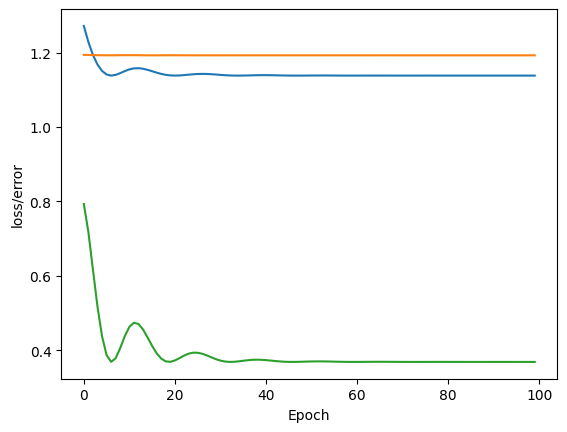

In [15]:
plt.plot(range(iterations), training_cost[0])
plt.plot(range(iterations), training_cost[1])
plt.plot(range(iterations), training_cost[2])
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [16]:

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.60)

# X_train = torch.FloatTensor(X_train)
# X_test = torch.FloatTensor(X_test)

# y_train = torch.FloatTensor(y_train)
# y_test = torch.FloatTensor(y_test)

In [17]:
# # Train
# epochs = 200
# losses = []
# for i in range(epochs):
#   # go forward and predict
#   y_pred = model.forward(X_train)

#   # Measure the loss
#   loss = criterion(y_pred,y_train)

#   # Keep track of the losses
#   losses.append(loss.detach().numpy())

#   # print every 10 epoch
#   if i % 10 == 0:
#     print(f'Epoch: {i} and loss: {loss}')

#   # Backpropagation
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()


In [18]:
# plt.plot(range(epochs), losses)
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')